<a href="https://colab.research.google.com/github/ashwantmanikoth/ML_WorkFlow/blob/main/assignment_2_huggingface_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1-Hugging Face Implementation

In [1]:
!pip install transformers
!pip install datasets
!pip install scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 25.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 29.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 36.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 44.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 32.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.7/493.7 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.1 MB/s eta 0:00:00


# 2-Importing required Libraries for hugging face dataset load and model *load*

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torchvision.models import resnet18
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import AutoFeatureExtractor, AutoModelForImageClassification
from transformers.models.convnext.image_processing_convnext import ConvNextImageProcessor
from datasets import load_dataset

# 3-Loading Dataset and Model

In [3]:

# Load model directly
dataset = load_dataset("cats_vs_dogs")
#Using Pretrained Model using cat vs dog which will have more accuracy
extractor = ConvNextImageProcessor.from_pretrained("akahana/vit-base-cats-vs-dogs")
model = AutoModelForImageClassification.from_pretrained("akahana/vit-base-cats-vs-dogs")


Generating train split:   0%|          | 0/23410 [00:00<?, ? examples/s]

# 4-Loading Images from Hugging Face dataset CatvsDogs in random order

In [4]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import random
from PIL import Image

y_true = []
y_pred = []
trained_data = dataset['train']
truelabel=[]

num_random_data_points = 5  # Change this to the desired number

random_indices = random.sample(range(len(trained_data)), num_random_data_points)

for i in random_indices:
  data = trained_data[i]
  image= data['image']
  labels = data['labels']

  inputs = extractor(image,return_tensors="pt",padding="True")  # Assuming 'images' is the input image

  # Make predictions
  with torch.no_grad():
    logits = model(**inputs).logits
    predicted_class = torch.argmax(logits, dim=1).cpu().numpy()
    truelabel.append(labels)
  y_pred.extend(predicted_class)
y_true.extend(truelabel)



# 5-Generating Confusion Matrix
The accuracy is high as the pretrained model is specifically trained on cat and dog images

Confusion Matrix:


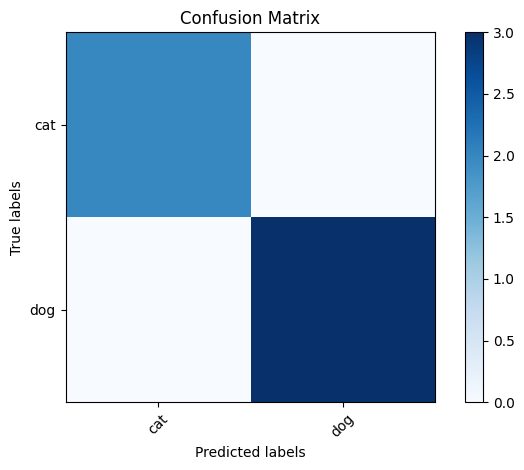

In [6]:
# Calculate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

print("Confusion Matrix:")
class_names =['cat','dog']

# Plot the confusion matrix
# plt.figure(figsize=(5, 5))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
plt.ylabel('True labels')
plt.xlabel('Predicted labels')
plt.tight_layout()
# Show the confusion m  atrix plot
plt.show()